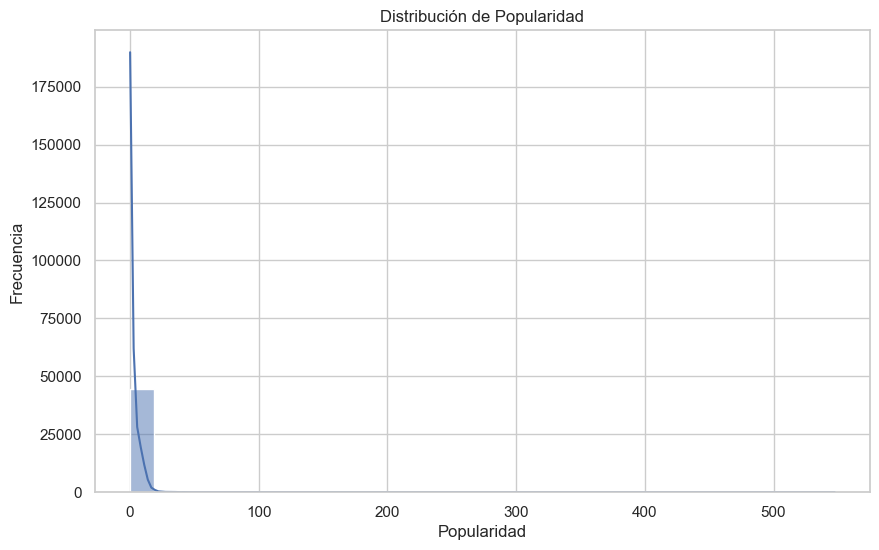

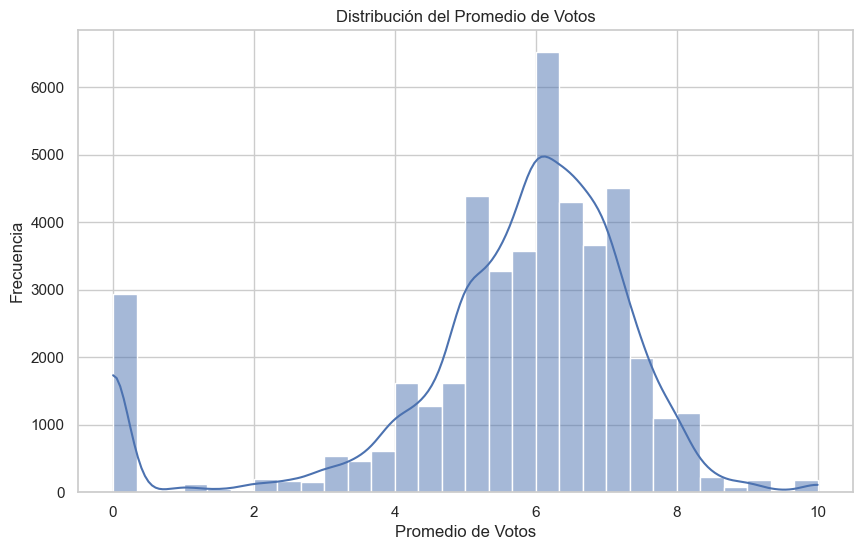

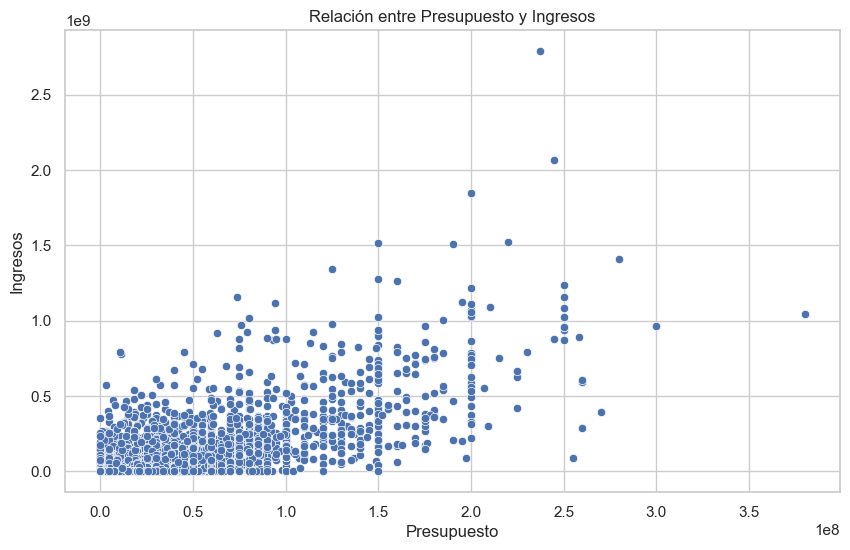

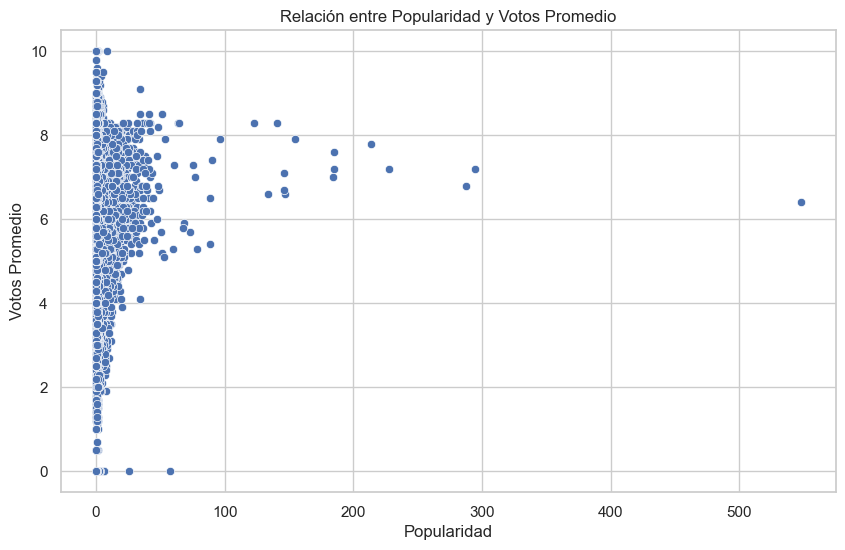

In [2]:
# Notebook de análisis de datos: EDA

# Paso 1: Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo visual para los gráficos
sns.set(style="whitegrid")

# Paso 2: Cargar los datos
ruta_datos = '../DATASET/movies_credits_merged.parquet'
movies = pd.read_parquet(ruta_datos)

# Paso 3: Análisis de distribuciones

## Distribución de popularidad
plt.figure(figsize=(10, 6))
sns.histplot(movies['popularity'], bins=30, kde=True)
plt.title('Distribución de Popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()

## Distribución de votos promedio
plt.figure(figsize=(10, 6))
sns.histplot(movies['vote_average'], bins=30, kde=True)
plt.title('Distribución del Promedio de Votos')
plt.xlabel('Promedio de Votos')
plt.ylabel('Frecuencia')
plt.show()

# Paso 4: Análisis de relaciones entre variables

## Relación entre presupuesto y ingresos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, x='budget', y='revenue')
plt.title('Relación entre Presupuesto y Ingresos')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.show()

## Relación entre popularidad y votos promedio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, x='popularity', y='vote_average')
plt.title('Relación entre Popularidad y Votos Promedio')
plt.xlabel('Popularidad')
plt.ylabel('Votos Promedio')
plt.show()

# Guarda este notebook en la carpeta correcta y asegúrate de revisar que las rutas y los nombres de archivo estén correctamente configurados


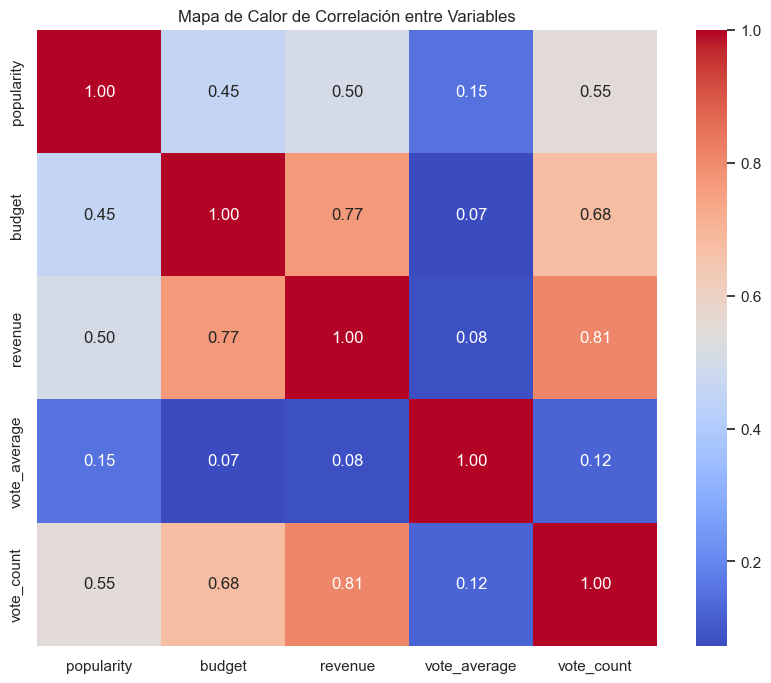

In [3]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
ruta_datos = '../DATASET/movies_credits_merged.parquet'
movies = pd.read_parquet(ruta_datos)

# Seleccionar solo las columnas numéricas para el análisis de correlación
numerical_data = movies[['popularity', 'budget', 'revenue', 'vote_average', 'vote_count']]

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Generar un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()


Interpretación del Mapa de Calor
Valores en la Diagonal (1.00): Son las correlaciones de cada variable consigo misma, por lo que son perfectamente correlacionadas (correlación = 1).

Presupuesto (Budget) y Ingresos (Revenue):
Hay una fuerte correlación positiva entre el presupuesto de una película y los ingresos que genera. Esto sugiere que las películas con mayores presupuestos tienden a generar mayores ingresos.

Popularidad (Popularity) y Conteo de Votos (Vote Count):
Existe una correlación positiva significativa entre la popularidad de una película y el número de votos que recibe. Esto puede indicar que las películas más populares atraen más votos.

Ingresos (Revenue) y Conteo de Votos (Vote Count):
Las películas con mayores ingresos también tienden a tener un mayor número de votos, lo que puede reflejar una mayor visibilidad o interés del público.

Presupuesto (Budget) y Popularidad (Popularity):
Hay una correlación moderada entre el presupuesto y la popularidad, sugiriendo que invertir más en la producción de una película puede contribuir a su popularidad.

Correlaciones Bajas:
Algunas variables como el vote_average (promedio de votos) tienen correlaciones relativamente bajas con otras variables como budget y revenue. Esto puede indicar que la calidad percibida de una película (según los votos promedio) no está necesariamente ligada a su presupuesto o éxito financiero.

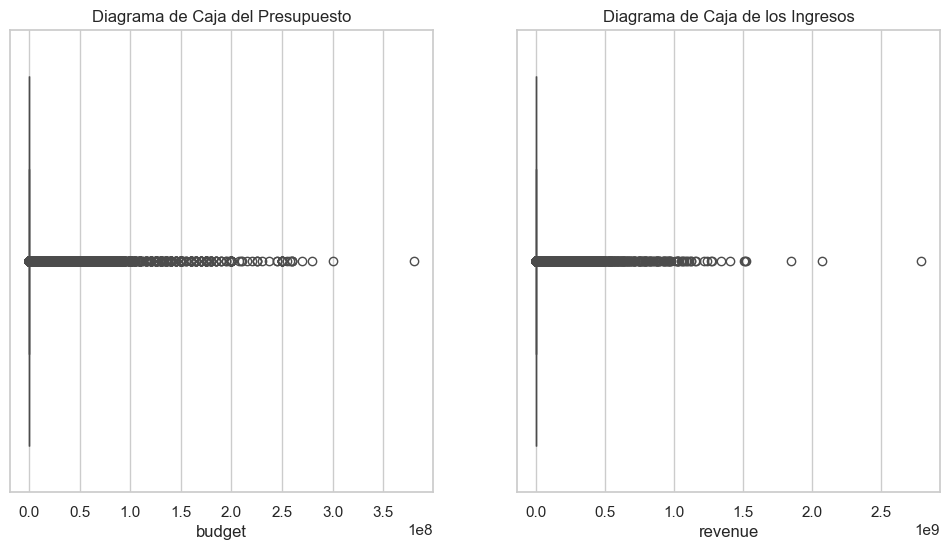

Outliers en Presupuesto:                    title    budget
0              Toy Story  30000000
1                Jumanji  65000000
3      Waiting to Exhale  16000000
5                   Heat  60000000
6                Sabrina  58000000
...                  ...       ...
44873    Corporate Event   2000000
44879               Mars   2000000
44880            Savages    800000
44882        Pro Lyuboff   2000000
44892            Antidur   5000000

[8781 rows x 2 columns]
Outliers en Ingresos:                              title      revenue
0                        Toy Story  373554033.0
1                          Jumanji  262797249.0
3                Waiting to Exhale   81452156.0
4      Father of the Bride Part II   76578911.0
5                             Heat  187436818.0
...                            ...          ...
44870                  All at Once          3.0
44872                  The Miracle      50656.0
44880                      Savages    1328612.0
44882                  Pro L

In [4]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
ruta_datos = '../DATASET/movies_credits_merged.parquet'
movies = pd.read_parquet(ruta_datos)

# Crear diagramas de caja para el presupuesto y los ingresos
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=movies['budget'])
plt.title('Diagrama de Caja del Presupuesto')

plt.subplot(1, 2, 2)
sns.boxplot(x=movies['revenue'])
plt.title('Diagrama de Caja de los Ingresos')
plt.show()

# Identifico outliers basado en el criterio IQR
Q1_budget = movies['budget'].quantile(0.25)
Q3_budget = movies['budget'].quantile(0.75)
IQR_budget = Q3_budget - Q1_budget

# límites para considerar un dato como outlier
lower_bound_budget = Q1_budget - 1.5 * IQR_budget
upper_bound_budget = Q3_budget + 1.5 * IQR_budget

# datos para identificar outliers en el presupuesto
outliers_budget = movies[(movies['budget'] < lower_bound_budget) | (movies['budget'] > upper_bound_budget)]

# lo mismo para los ingresos
Q1_revenue = movies['revenue'].quantile(0.25)
Q3_revenue = movies['revenue'].quantile(0.75)
IQR_revenue = Q3_revenue - Q1_revenue

lower_bound_revenue = Q1_revenue - 1.5 * IQR_revenue
upper_bound_revenue = Q3_revenue + 1.5 * IQR_revenue

outliers_revenue = movies[(movies['revenue'] < lower_bound_revenue) | (movies['revenue'] > upper_bound_revenue)]

# resultados
print("Outliers en Presupuesto:", outliers_budget[['title', 'budget']])
print("Outliers en Ingresos:", outliers_revenue[['title', 'revenue']])


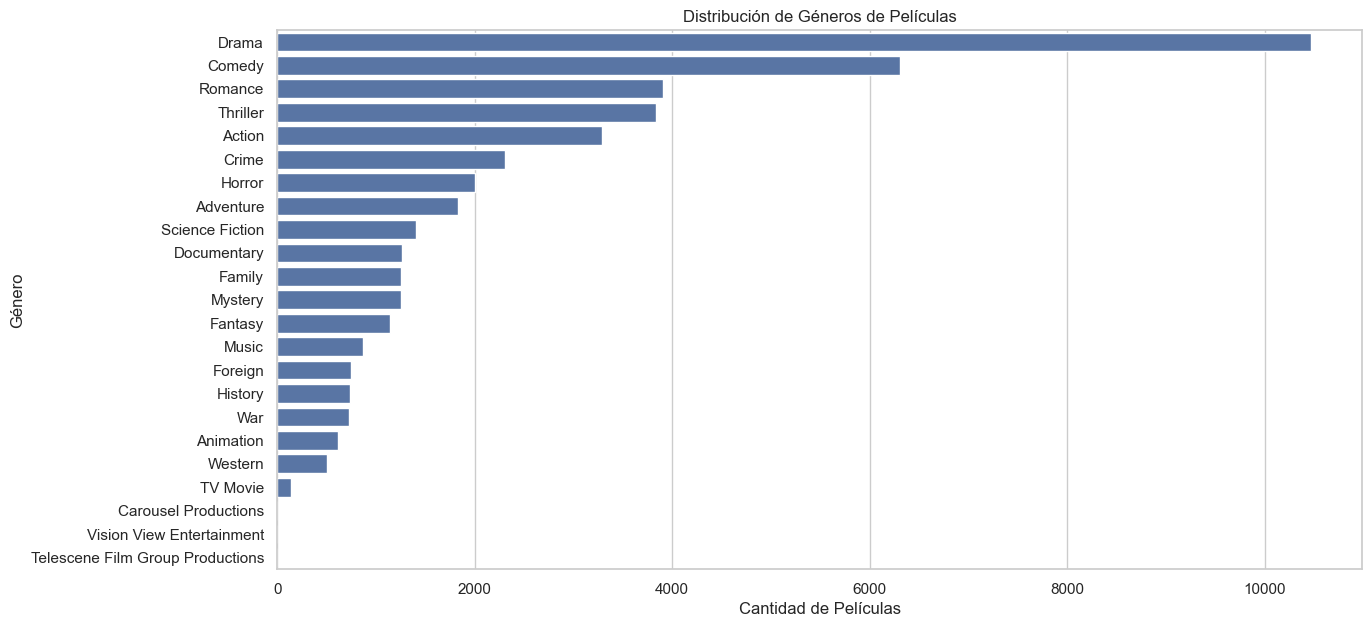

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ruta_datos = '../DATASET/merged_enriched_dataset.parquet'
data = pd.read_parquet(ruta_datos)

# Distribución de Géneros
plt.figure(figsize=(14, 7))
sns.countplot(y='genre_name', data=data, order=data['genre_name'].value_counts().index)
plt.title('Distribución de Géneros de Películas')
plt.xlabel('Cantidad de Películas')
plt.ylabel('Género')
plt.show()


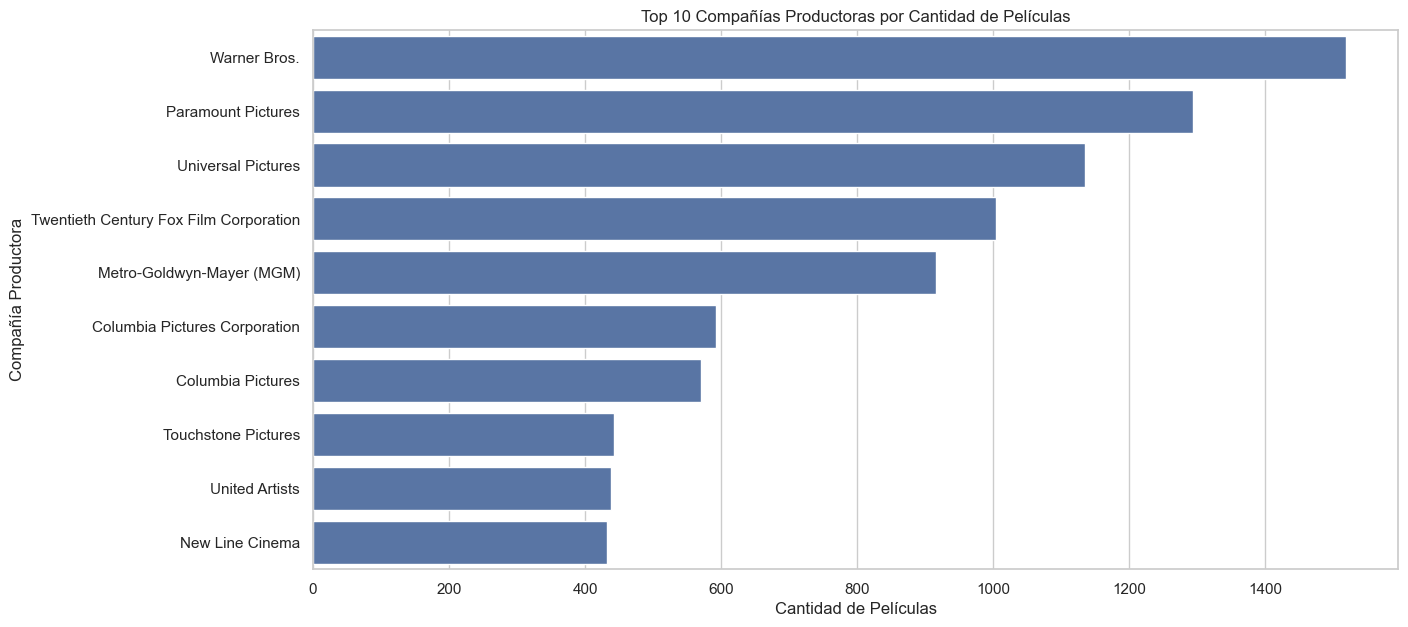

In [6]:
# Compañías Productoras Más Populares
plt.figure(figsize=(14, 7))
sns.countplot(y='company_name', data=data, order=data['company_name'].value_counts().index[:10])
plt.title('Top 10 Compañías Productoras por Cantidad de Películas')
plt.xlabel('Cantidad de Películas')
plt.ylabel('Compañía Productora')
plt.show()


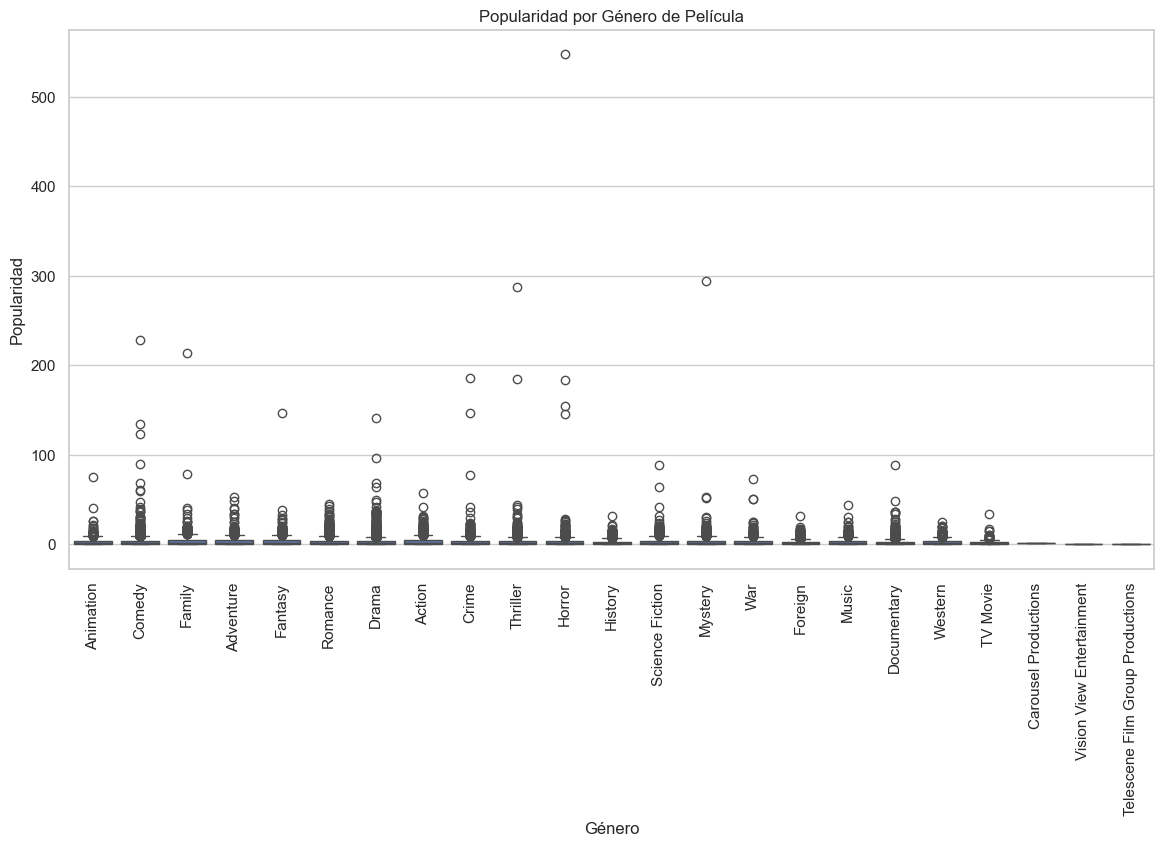

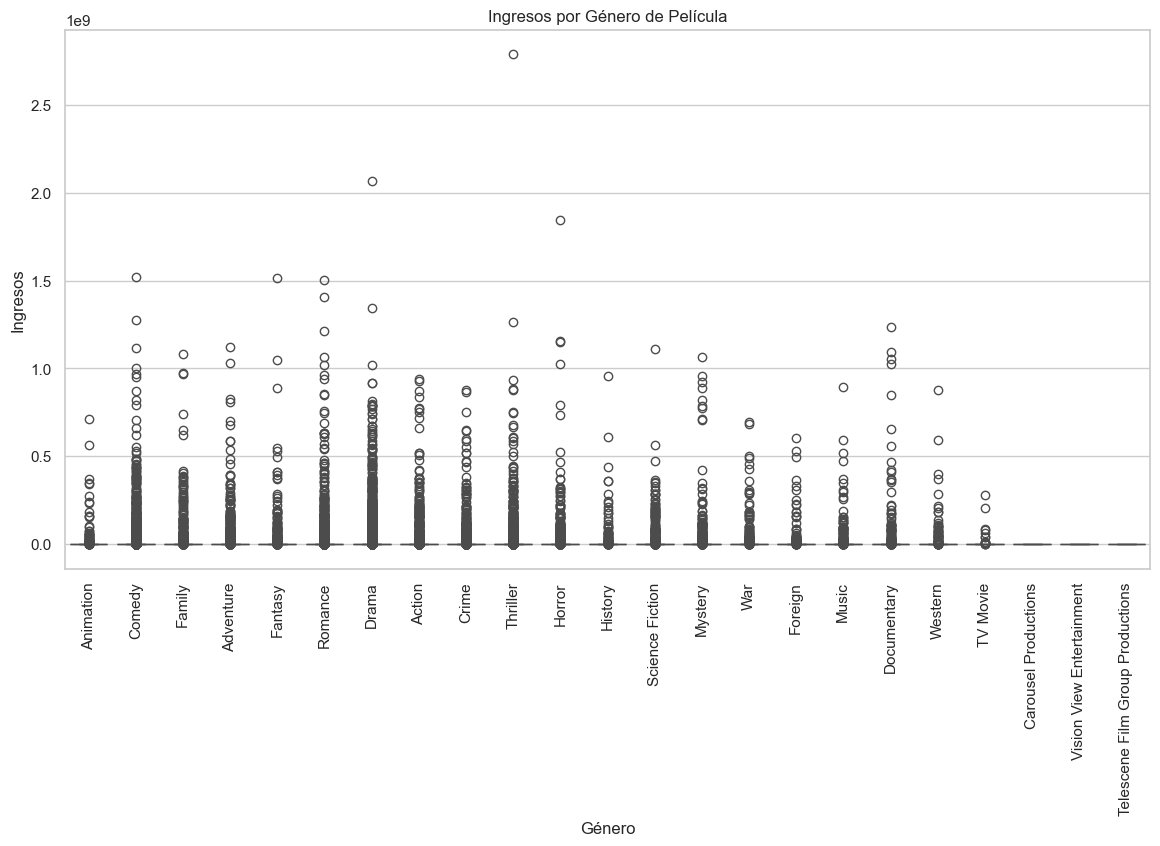

In [7]:
# Relación entre Género y Popularidad
plt.figure(figsize=(14, 7))
sns.boxplot(x='genre_name', y='popularity', data=data)
plt.title('Popularidad por Género de Película')
plt.xlabel('Género')
plt.ylabel('Popularidad')
plt.xticks(rotation=90)
plt.show()

# Relación entre Género e Ingresos
plt.figure(figsize=(14, 7))
sns.boxplot(x='genre_name', y='revenue', data=data)
plt.title('Ingresos por Género de Película')
plt.xlabel('Género')
plt.ylabel('Ingresos')
plt.xticks(rotation=90)
plt.show()


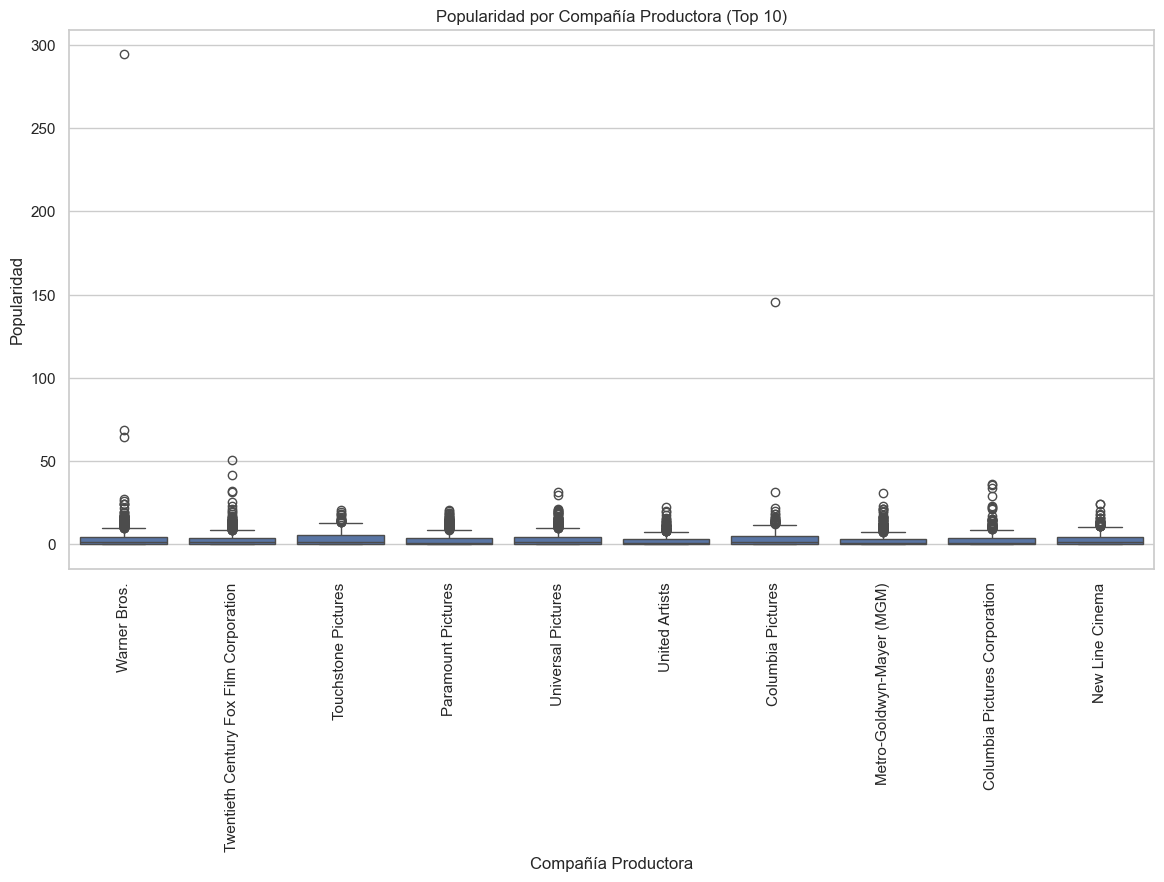

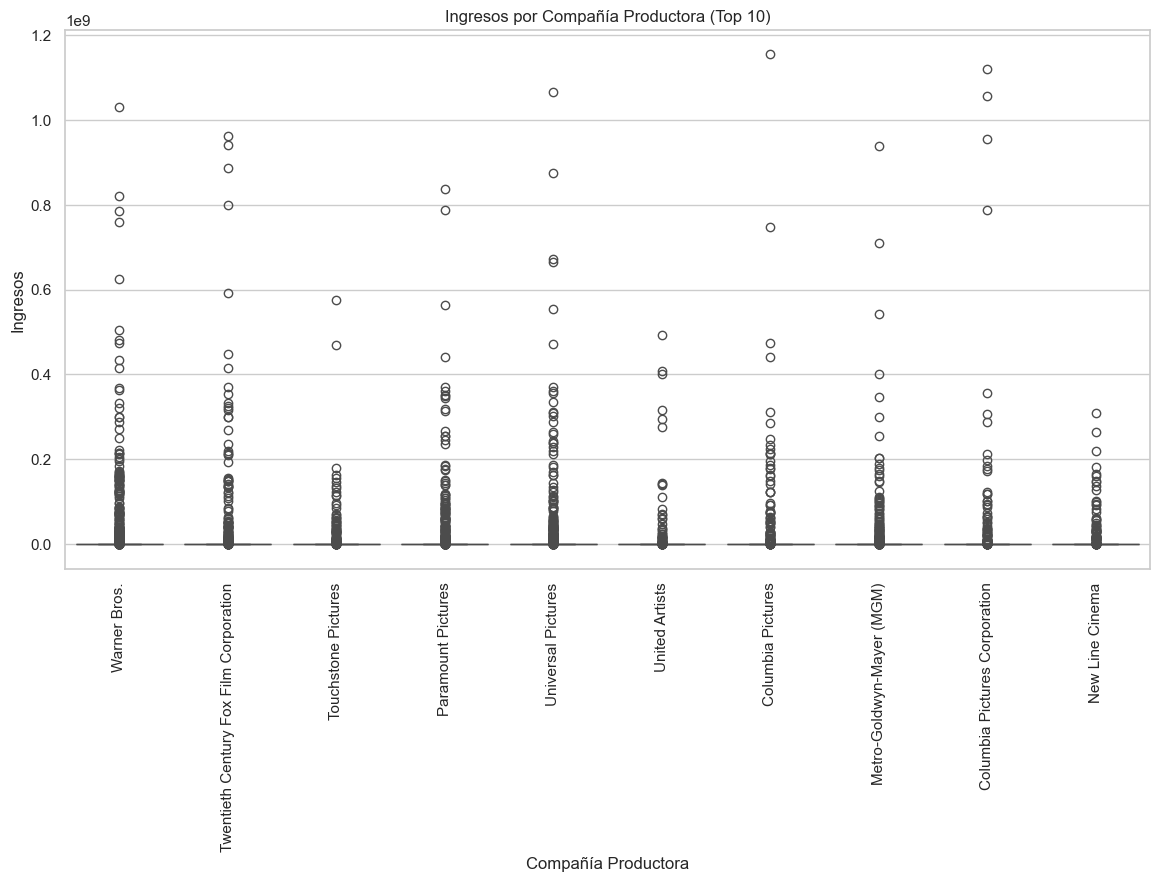

In [8]:
# Relación entre Compañía Productora y Popularidad
plt.figure(figsize=(14, 7))
sns.boxplot(x='company_name', y='popularity', data=data[data['company_name'].isin(data['company_name'].value_counts().index[:10])])
plt.title('Popularidad por Compañía Productora (Top 10)')
plt.xlabel('Compañía Productora')
plt.ylabel('Popularidad')
plt.xticks(rotation=90)
plt.show()

# Relación entre Compañía Productora e Ingresos
plt.figure(figsize=(14, 7))
sns.boxplot(x='company_name', y='revenue', data=data[data['company_name'].isin(data['company_name'].value_counts().index[:10])])
plt.title('Ingresos por Compañía Productora (Top 10)')
plt.xlabel('Compañía Productora')
plt.ylabel('Ingresos')
plt.xticks(rotation=90)
plt.show()


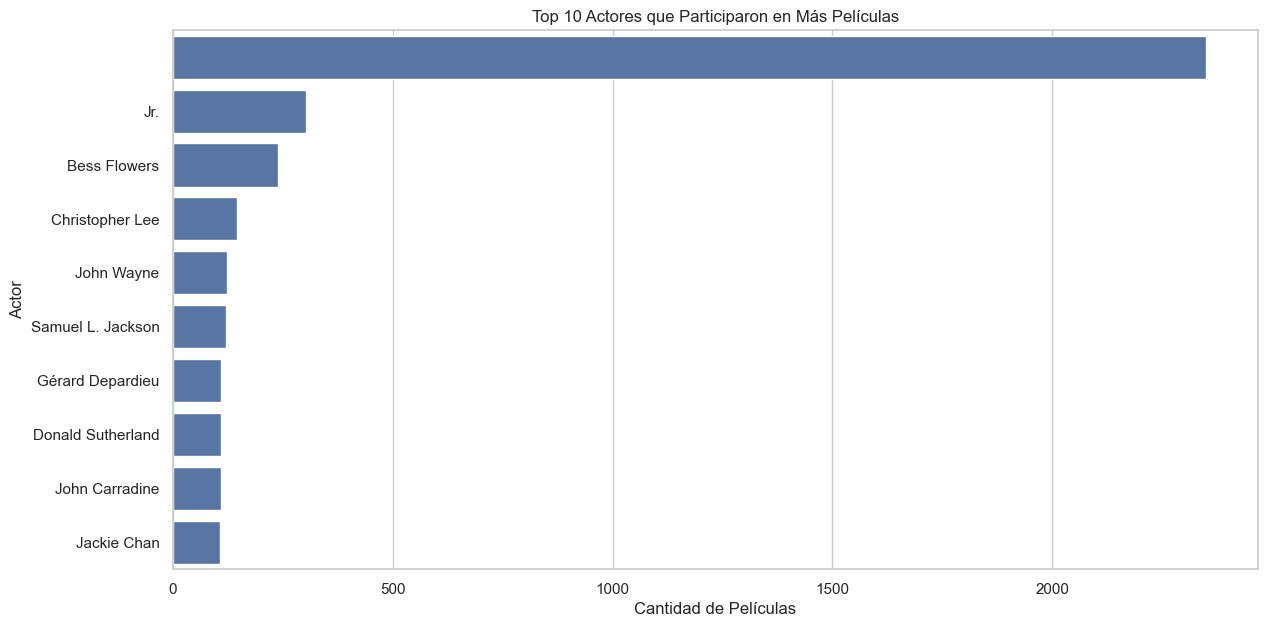

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carga del dataset
data_path = '../DATASET/merged_enriched_dataset.parquet'
data = pd.read_parquet(data_path)

# Separar los actores en listas
data['actors'] = data['actors'].fillna('').apply(lambda x: x.split(', '))

# DataFrame de los actores con la cantidad de películas en las que participaron
actors_list = data.explode('actors')
actor_counts = actors_list['actors'].value_counts().reset_index()
actor_counts.columns = ['actor', 'count']

# top 10 actores que han participado en más películas
top_10_actors = actor_counts.head(10)

# Graficar los top 10 actores
plt.figure(figsize=(14, 7))
sns.barplot(y='actor', x='count', data=top_10_actors)
plt.title('Top 10 Actores que Participaron en Más Películas')
plt.xlabel('Cantidad de Películas')
plt.ylabel('Actor')
plt.show()


       actor  count
0              2349
1        Jr.    304
1145    Mako     35
2003    Totò     28
2445    Flea     25
...      ...    ...
195514  Siné      1
196406   Van      1
198035   Omm      1
199707   Eli      1
199816   Lou      1

[297 rows x 2 columns]


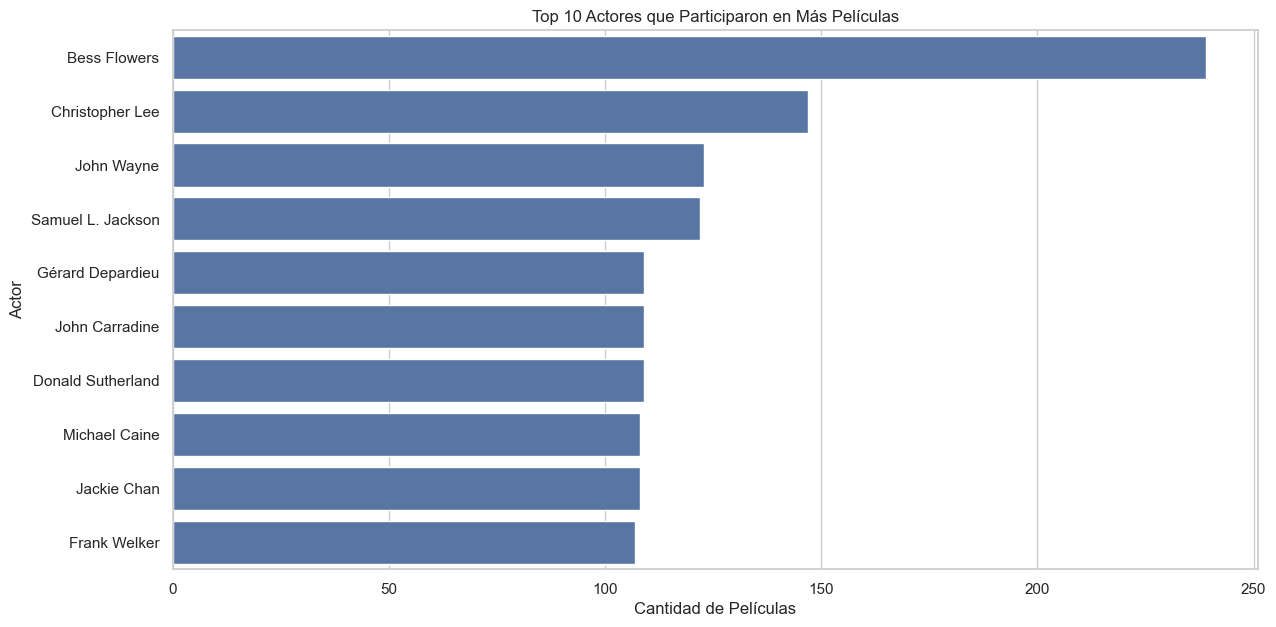

In [11]:
# Verificar los nombres de los actores que contienen solo una parte del nombre
partial_names = actor_counts[actor_counts['actor'].str.len() < 5]
print(partial_names)

# Filtrar actores con nombres completos
actors_list = data.explode('actors')
actors_list = actors_list[actors_list['actors'].str.split().str.len() > 1]

# Crear un DataFrame de los actores con la cantidad de películas en las que participaron, después de filtrar
actor_counts = actors_list['actors'].value_counts().reset_index()
actor_counts.columns = ['actor', 'count']

# top 10 actores que han participado en más películas
top_10_actors = actor_counts.head(10)

plt.figure(figsize=(14, 7))
sns.barplot(y='actor', x='count', data=top_10_actors)
plt.title('Top 10 Actores que Participaron en Más Películas')
plt.xlabel('Cantidad de Películas')
plt.ylabel('Actor')
plt.show()


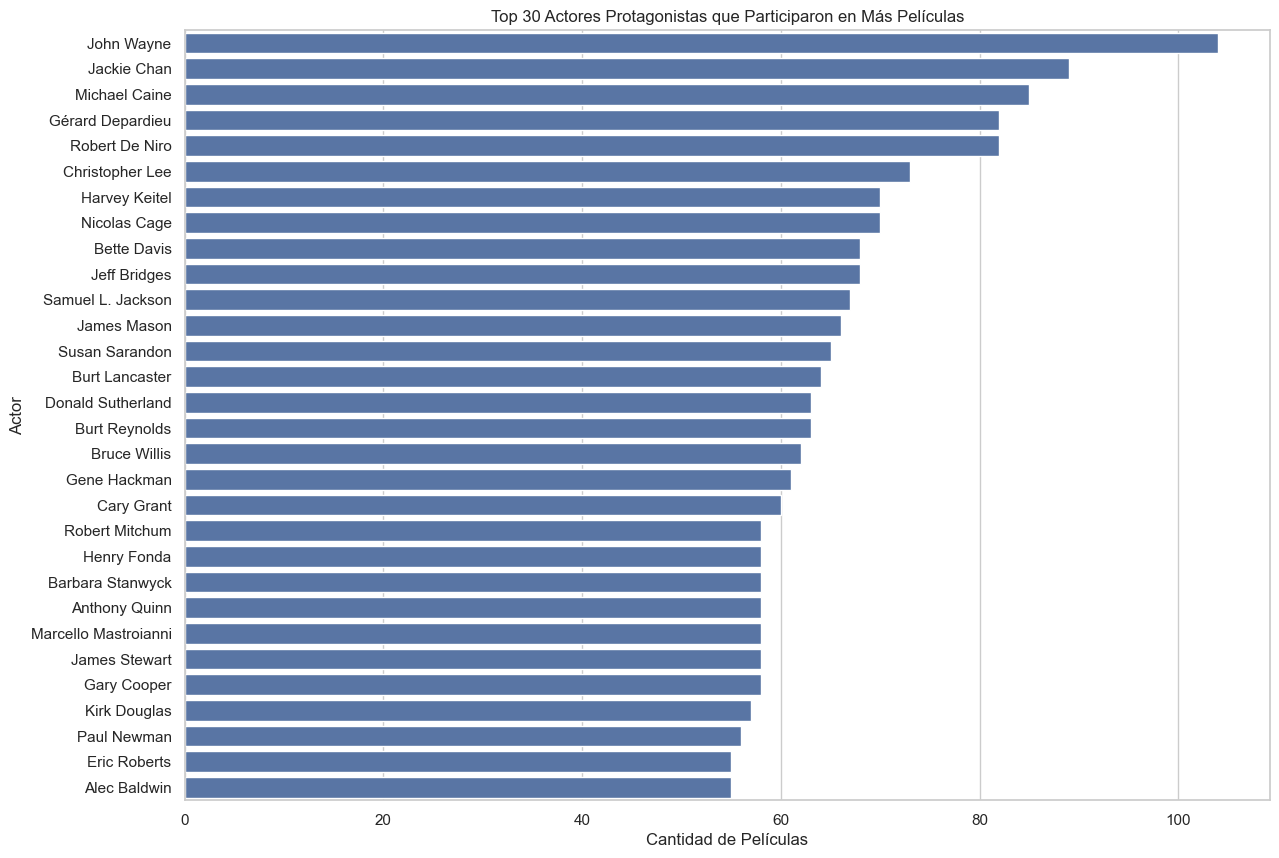

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carga del dataset
data_path = '../DATASET/merged_enriched_dataset.parquet'
data = pd.read_parquet(data_path)

# Separar los actores en listas y eliminar valores nulos o vacíos
data['actors'] = data['actors'].fillna('').apply(lambda x: x.split(', '))
data['actors'] = data['actors'].apply(lambda x: [actor for actor in x if actor.strip() != ''])

# Tomar los primeros tres actores de cada lista
data['protagonists'] = data['actors'].apply(lambda x: x[:3] if len(x) >= 3 else x)

# DataFrame de los actores protagonistas con la cantidad de películas en las que participaron
protagonists_list = data.explode('protagonists')
protagonists_list = protagonists_list[protagonists_list['protagonists'].str.strip() != '']
protagonist_counts = protagonists_list['protagonists'].value_counts().reset_index()
protagonist_counts.columns = ['actor', 'count']

# top 30 actores que han participado en más películas
top_30_protagonists = protagonist_counts.head(30)

# Graficar los top 30 actores que participaron en más películas como protagonistas
plt.figure(figsize=(14, 10))
sns.barplot(y='actor', x='count', data=top_30_protagonists)
plt.title('Top 30 Actores Protagonistas que Participaron en Más Películas')
plt.xlabel('Cantidad de Películas')
plt.ylabel('Actor')
plt.show()



C:\Users\germa\AppData\Local\Temp\ipykernel_17568\2105215149.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='actor', x='count', data=top_10_protagonists, palette=colors)


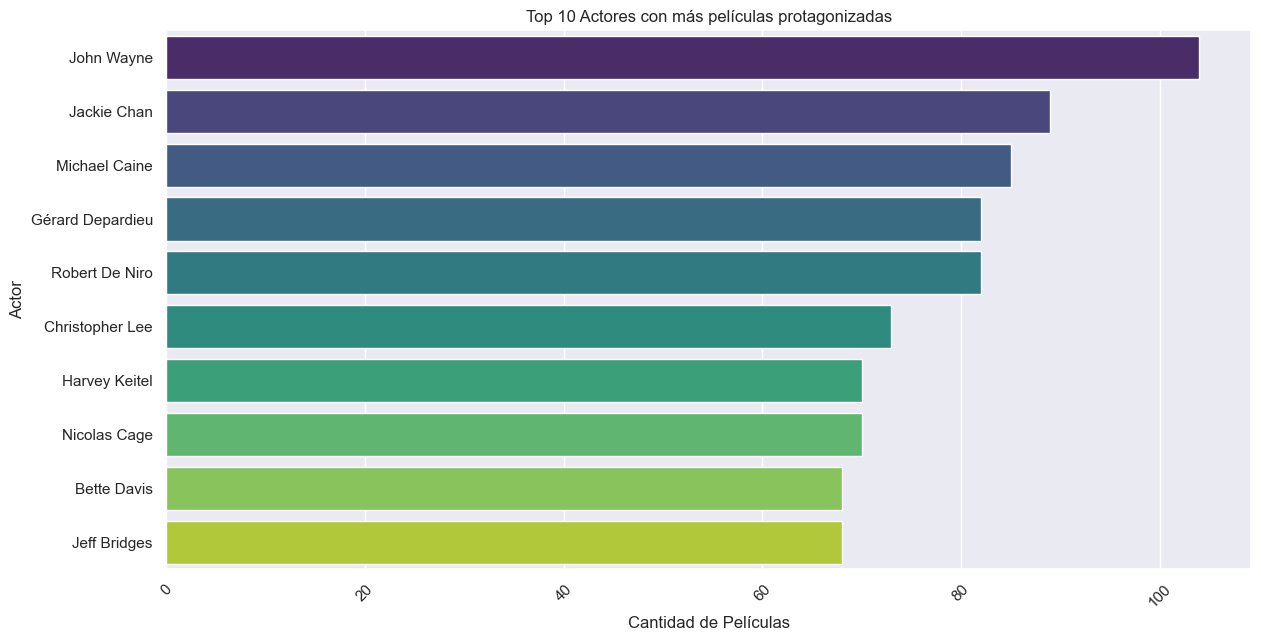

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
data_path = '../DATASET/merged_enriched_dataset.parquet'
data = pd.read_parquet(data_path)

# Separar los actores en listas y eliminar valores nulos o vacíos
data['actors'] = data['actors'].fillna('').apply(lambda x: x.split(', '))
data['actors'] = data['actors'].apply(lambda x: [actor for actor in x if actor.strip() != ''])

# primeros tres actores de cada lista
data['protagonists'] = data['actors'].apply(lambda x: x[:3] if len(x) >= 3 else x)

# DataFrame de los actores protagonistas con la cantidad de películas en las que participaron
protagonists_list = data.explode('protagonists')
protagonists_list = protagonists_list[protagonists_list['protagonists'].str.strip() != '']
protagonist_counts = protagonists_list['protagonists'].value_counts().reset_index()
protagonist_counts.columns = ['actor', 'count']

#  10 actores que han participado en más películas
top_10_protagonists = protagonist_counts.head(10)

# estilo de Seaborn y los colores
sns.set(style="darkgrid")
colors = sns.color_palette("viridis", len(top_10_protagonists))

# Graficar 
plt.figure(figsize=(14, 7))
sns.barplot(y='actor', x='count', data=top_10_protagonists, palette=colors)
plt.title('Top 10 Actores con más películas protagonizadas')
plt.xlabel('Cantidad de Películas')
plt.ylabel('Actor')
plt.xticks(rotation=45)
plt.show()


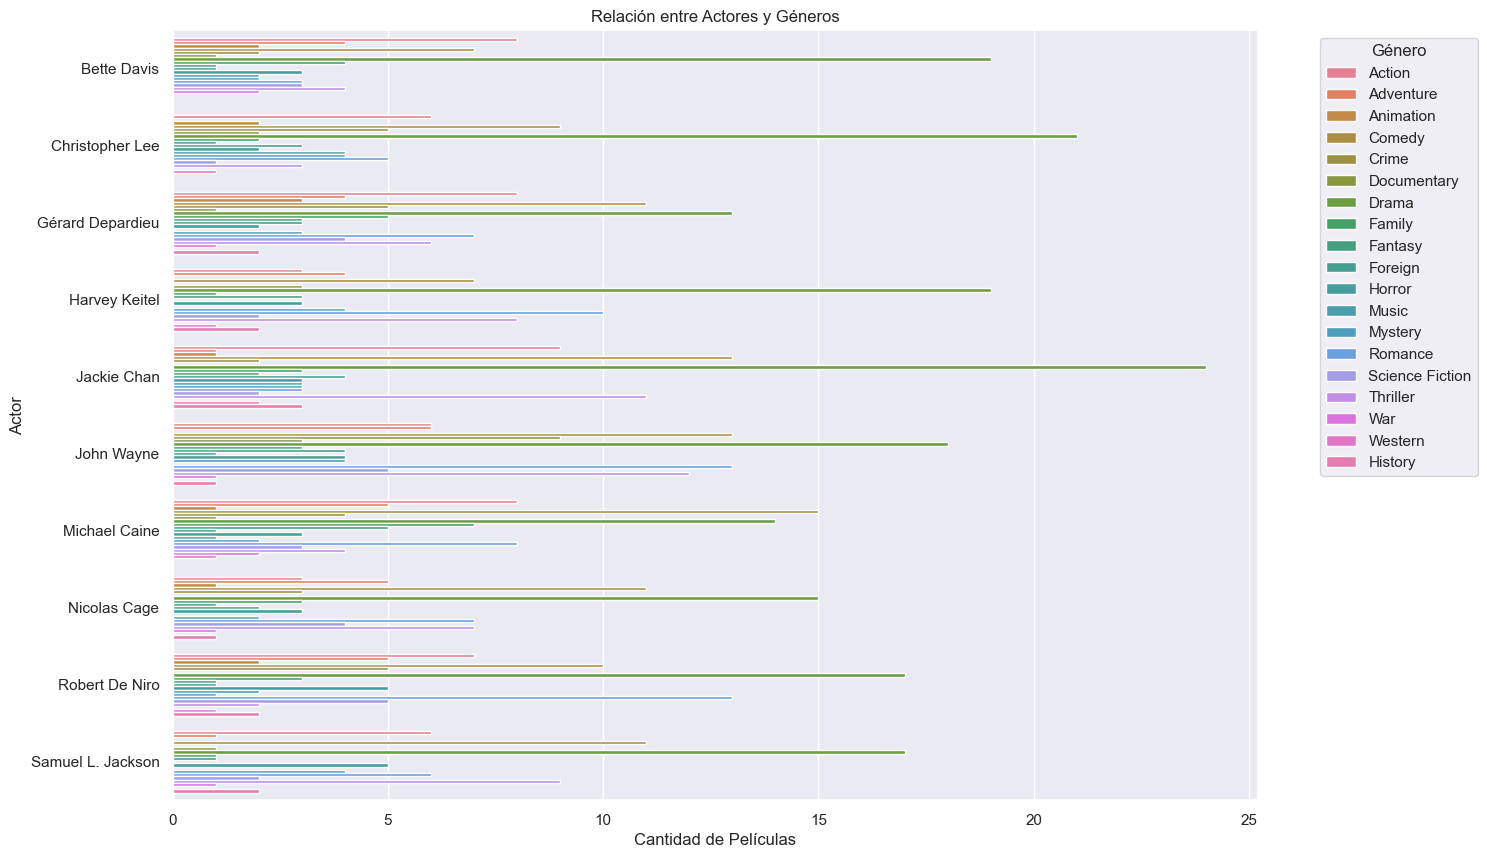

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset resultante
data_path = '../DATASET/merged_enriched_dataset.parquet'
data = pd.read_parquet(data_path)

# Separar los actores en listas y eliminar valores nulos o vacíos
data['actors'] = data['actors'].fillna('').apply(lambda x: x.split(', '))
data['actors'] = data['actors'].apply(lambda x: [actor for actor in x if actor.strip() != ''])

# Tomar los primeros tres actores de cada lista
data['protagonists'] = data['actors'].apply(lambda x: x[:3] if len(x) >= 3 else x)

# Explode para obtener una fila por actor
actors_genres = data.explode('protagonists')

# Contar la frecuencia de aparición de cada actor por género
actor_genre_counts = actors_genres.groupby(['protagonists', 'genre_name']).size().reset_index(name='count')

# Filtrar los actores más frecuentes
top_actors = actor_genre_counts.groupby('protagonists')['count'].sum().sort_values(ascending=False).head(10).index
top_actors_genres = actor_genre_counts[actor_genre_counts['protagonists'].isin(top_actors)]

# Graficar la relación entre actores y géneros
plt.figure(figsize=(14, 10))
sns.barplot(x='count', y='protagonists', hue='genre_name', data=top_actors_genres)
plt.title('Relación entre Actores y Géneros')
plt.xlabel('Cantidad de Películas')
plt.ylabel('Actor')
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


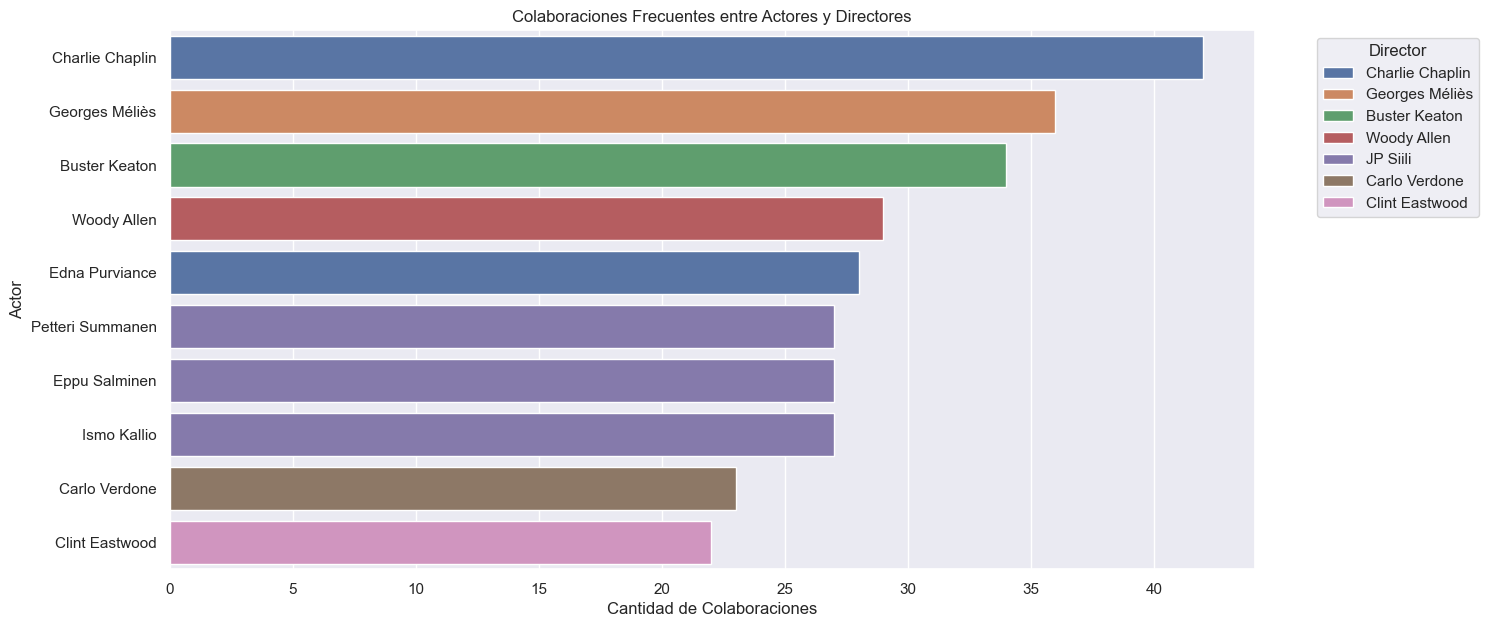

In [17]:
# Separar los directores en listas y eliminar valores nulos o vacíos
data['directors'] = data['directors'].fillna('').apply(lambda x: x.split(', '))
data['directors'] = data['directors'].apply(lambda x: [director for director in x if director.strip() != ''])

# Explode para obtener una fila por actor y director
collaborations = data.explode('protagonists').explode('directors')

# Contar la frecuencia de colaboración entre actores y directores
collaboration_counts = collaborations.groupby(['protagonists', 'directors']).size().reset_index(name='count')

# Filtrar las colaboraciones más frecuentes
top_collaborations = collaboration_counts.sort_values(by='count', ascending=False).head(10)

# Graficar las colaboraciones más frecuentes
plt.figure(figsize=(14, 7))
sns.barplot(x='count', y='protagonists', hue='directors', data=top_collaborations)
plt.title('Colaboraciones Frecuentes entre Actores y Directores')
plt.xlabel('Cantidad de Colaboraciones')
plt.ylabel('Actor')
plt.legend(title='Director', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


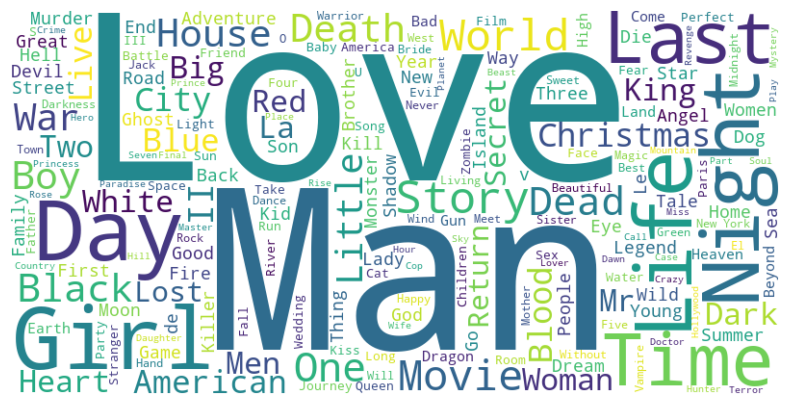

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generar una cadena con todos los títulos de películas
all_titles = ' '.join(data['title'])

# Crear una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

